# iFood Marketing analysis
- perform exploratory and statistical analysis to uncover actionable insights to help optimize the organizations marketing campaigns

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#filter unneccesary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df = pd.read_csv(r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0SL1EN/marketing_campaign.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Objectives

#### questions to ask
- is there a relationship between the campaign acceptance and the customers profiles(income, kidathome)
- is there a relationship between a customers purchasing characteristics and the acceptance to marketing campaings?
- is there a relationship between a customers profile and their purchasing characteristics

#### deliver insights both in graphs and visualizations
- pivot table summaries
- plot visualizations
- use streamlit for presentations 


## Data Wrangling and Preprocessing 

In [3]:
# check for missing values, data type inconsistencies and shape
print('df shape\n', df.shape)
df.info()

df shape
 (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases

In [4]:
# fill null income values with 0
df['Income'] = df['Income'].fillna(0)

# drop duplicates
df.drop_duplicates()

# correct data type inconcistencies
df[['Marital_Status', 'Education']] = df[['Marital_Status', 'Education']].astype('category')

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

print('shape:\n', df.shape)
df.head()

shape:
 (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# calculate new col for customer age at 2020
df['customer_age'] = 2020 - df.Year_Birth

# drop Year_Birth column
df.drop('Year_Birth', axis=1, inplace=True)
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,63
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,66
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,55
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,36
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,39


In [6]:
cols = [col for col in df.select_dtypes(exclude='category')]

14


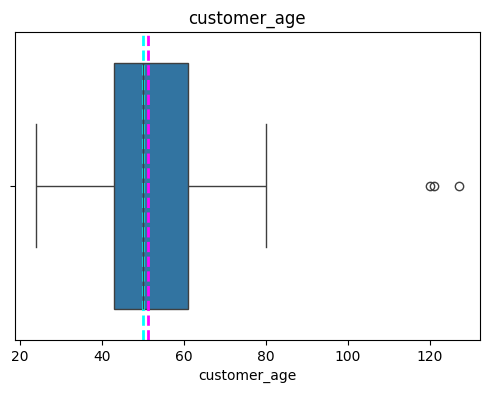

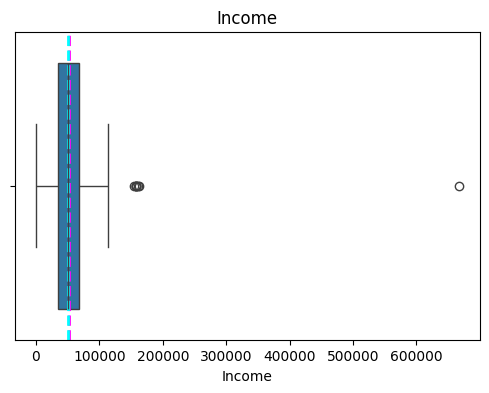

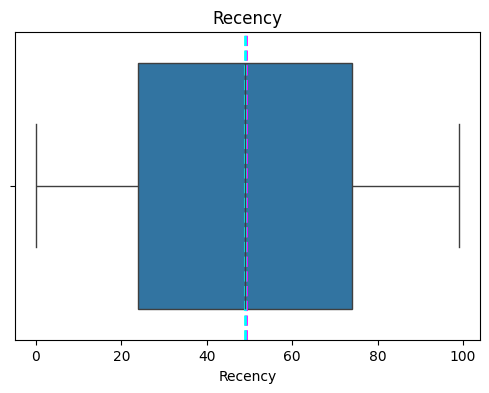

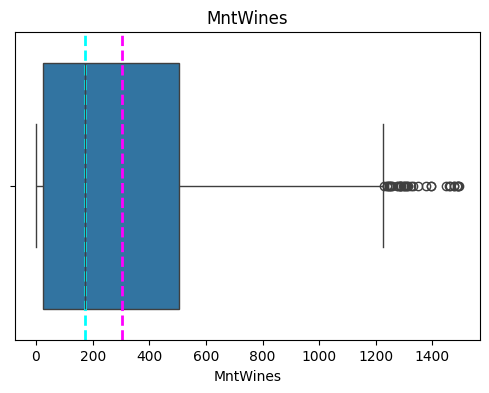

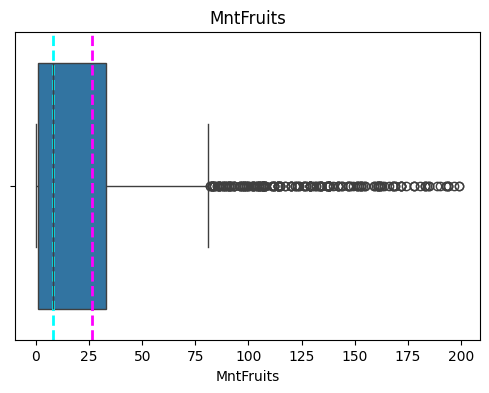

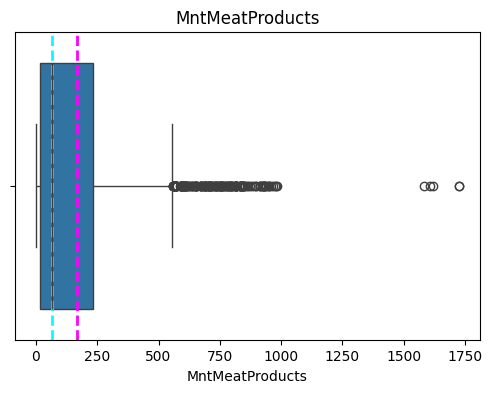

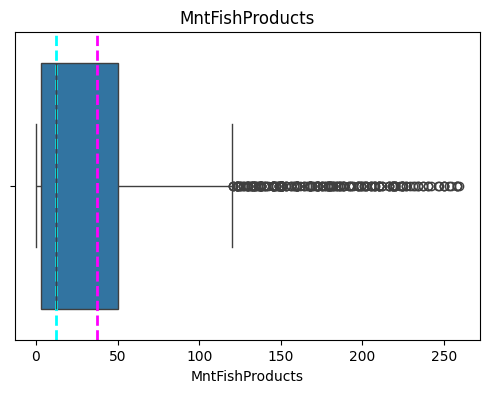

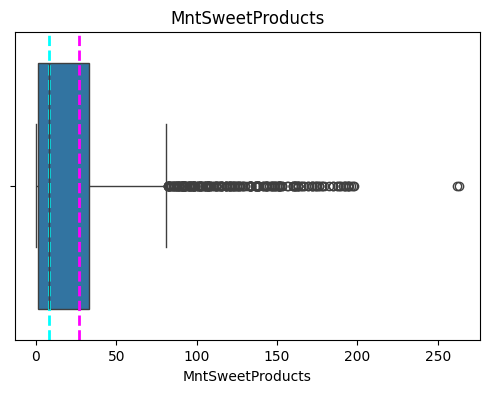

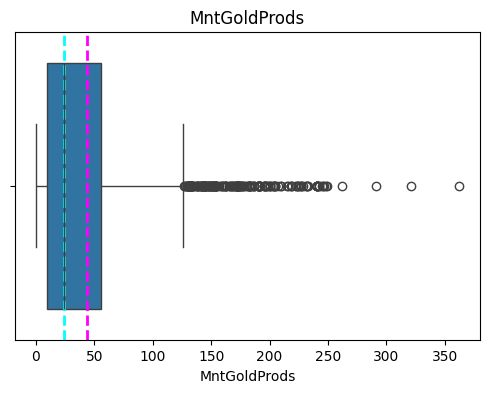

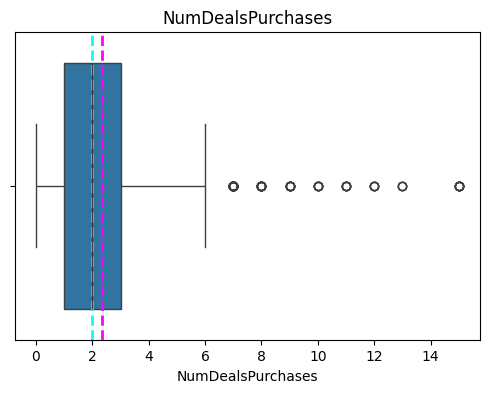

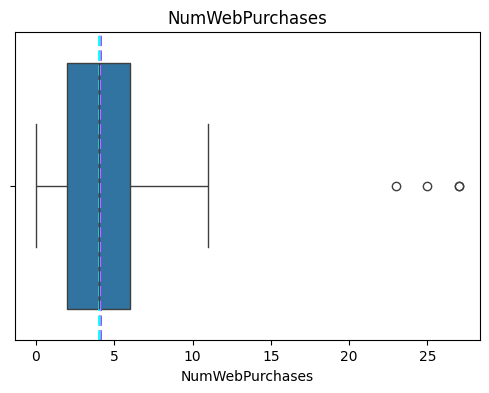

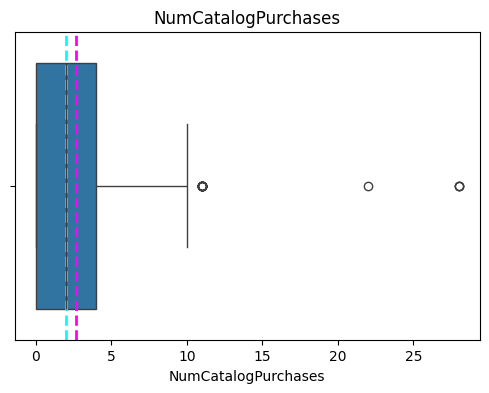

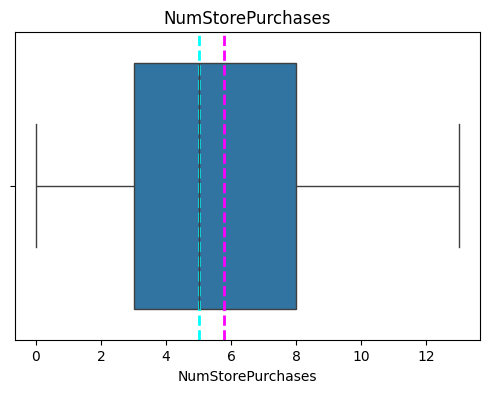

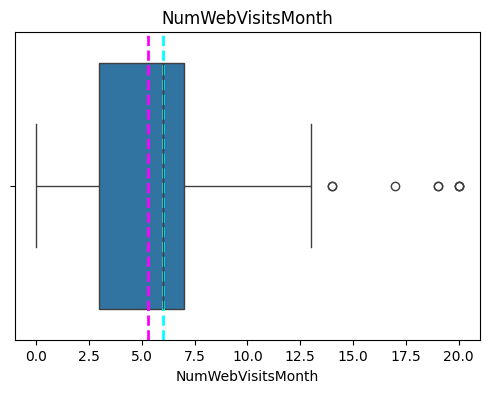

In [7]:
# Investigate outliers
num_cols = ['customer_age','Income', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','NumDealsPurchases',
'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
print(len(num_cols))

# plot boxplots for the columns
for col in num_cols:
    fig = plt.figure(figsize=(6,4))
    axs= fig.gca()
    sns.boxplot(data=df, x=col)
    axs.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    axs.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    axs.set_title(col)

plt.show()

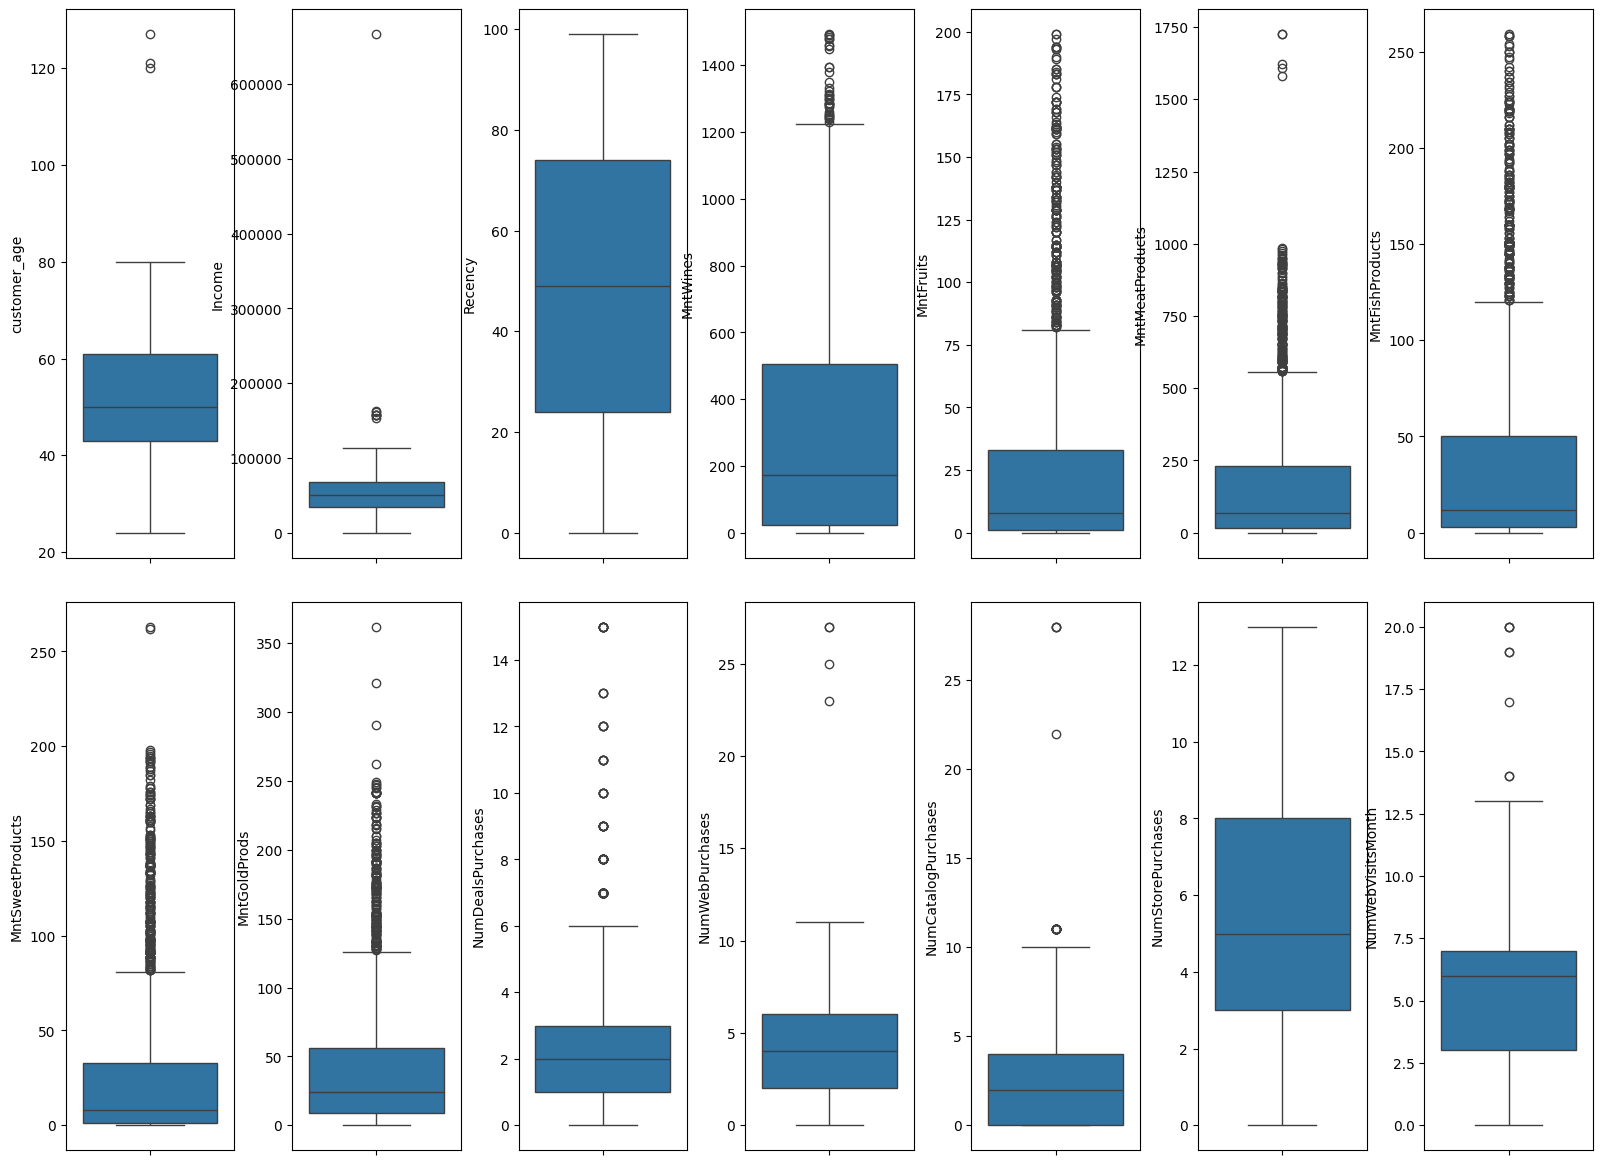

In [31]:
# plot boxplots for each numerical column
def plot_boxplots(df):
    fig,axs = plt.subplots(2, 7, figsize=(16, 12))
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    axs = axs.flatten()
    plt.tight_layout()

    for index, col in enumerate(num_cols):
        if index < len(num_cols):
            sns.boxplot(df[col], ax=axs[index])

        else:
            break

    plt.show()

plot_boxplots(df)

##### Retain Outliers
This is because they contain useful information 

### Descriptive analysis

In [8]:
#drop the 'Z_CostContact', 'Z_Revenue' columns because they dont add much information to our analysis(they are constant for all records)
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# rearrange the columns 
start_cols= ['ID', 'customer_age']
new_columns_order= start_cols + [col for col in df.columns if col not in start_cols]

df = df.reindex(columns=new_columns_order)

In [9]:
#summary statistics
round(df.describe(),2 ).T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.16,0.0,2828.25,5458.5,8427.75,11191.0,3246.66
customer_age,2240.0,51.19,24.0,43.0,50.0,61.0,127.0,11.98
Income,2240.0,51687.46,0.0,34722.0,51075.0,68289.75,666666.0,25609.34
Kidhome,2240.0,0.44,0.0,0.0,0.0,1.0,2.0,0.54
Teenhome,2240.0,0.51,0.0,0.0,0.0,1.0,2.0,0.54
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.11,0.0,24.0,49.0,74.0,99.0,28.96
MntWines,2240.0,303.94,0.0,23.75,173.5,504.25,1493.0,336.6
MntFruits,2240.0,26.3,0.0,1.0,8.0,33.0,199.0,39.77
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.72


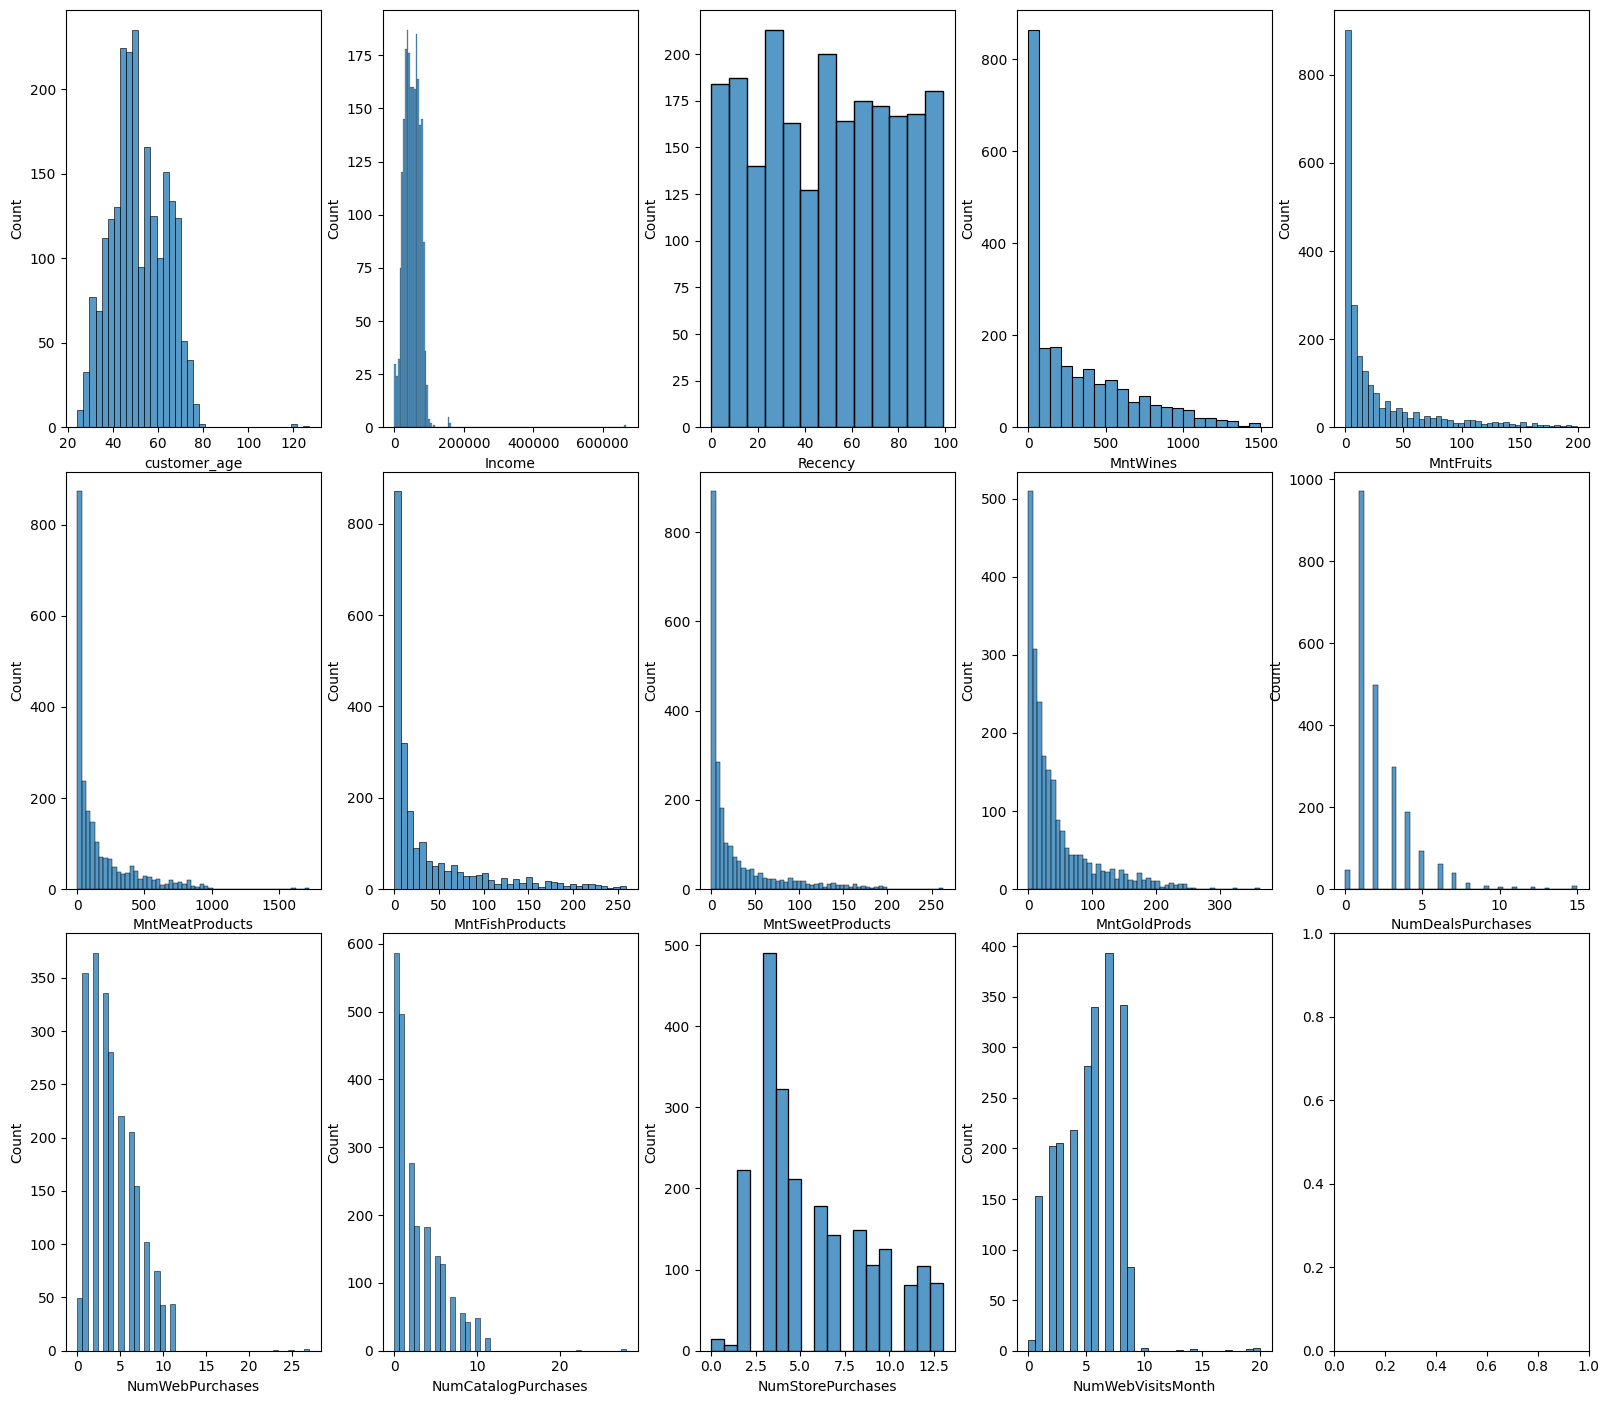

In [43]:
# investigate distribution for numerical columns non binary columns
dist_cols = ['customer_age', 'Income','Recency', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

def plot_histograms(df, dist_cols):
    fig, axs = plt.subplots(3, 5, figsize=(16,14))
    axs = axs.flatten()
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.tight_layout()


    for index, col in enumerate(dist_cols):
        if index < len(dist_cols):
            sns.histplot(data=df, x=col, ax=axs[index])

        else:
            break
plt.show()
plot_histograms(df, dist_cols)

#investigating num_cols
- distributions
- correlation with each other ( pairplot, correlation coefficients, heatmap)
- correlation with marketing metrics

#investigating object cols
- bar plots with hue for marketing metrics cols
- pivot charts, crosstabs


In [ ]:
# correlation between num cols
num_cols1 = [col for col in df.select_dtypes(exclude='category') if col not in 'ID' ]
corr = df[num_cols1].corr()
round(corr, 3)

,customer_age,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
customer_age,1.000,0.155,-0.230,0.352,0.022,0.020,0.158,0.018,0.031,0.042,...,0.121,0.128,-0.121,-0.062,0.061,-0.007,0.006,0.007,0.030,-0.021
Income,0.155,1.000,-0.425,0.015,0.019,-0.011,0.571,0.422,0.565,0.432,...,0.580,0.521,-0.535,-0.010,0.175,0.330,0.267,0.088,-0.024,0.136
Kidhome,-0.230,-0.425,1.000,-0.036,0.053,0.009,-0.496,-0.373,-0.437,-0.388,...,-0.502,-0.500,0.448,0.015,-0.162,-0.206,-0.172,-0.082,0.040,-0.080
Teenhome,0.352,0.015,-0.036,1.000,-0.017,0.016,0.005,-0.177,-0.261,-0.204,...,-0.111,0.051,0.135,-0.043,0.039,-0.191,-0.140,-0.016,0.003,-0.154
Dt_Customer,0.022,0.019,0.053,-0.017,1.000,-0.025,-0.166,-0.067,-0.093,-0.081,...,-0.096,-0.111,-0.272,0.008,-0.018,0.006,0.040,-0.006,-0.033,-0.194
Recency,0.020,-0.011,0.009,0.016,-0.025,1.000,0.016,-0.004,0.023,0.001,...,0.025,0.001,-0.021,-0.033,0.019,0.000,-0.019,-0.002,0.013,-0.198
MntWines,0.158,0.571,-0.496,0.005,-0.166,0.016,1.000,0.390,0.563,0.400,...,0.635,0.642,-0.321,0.062,0.373,0.473,0.354,0.206,-0.039,0.247
MntFruits,0.018,0.422,-0.373,-0.177,-0.067,-0.004,0.390,1.000,0.543,0.595,...,0.488,0.462,-0.418,0.015,0.010,0.216,0.195,-0.010,-0.005,0.125
MntMeatProducts,0.031,0.565,-0.437,-0.261,-0.093,0.023,0.563,0.543,1.000,0.568,...,0.724,0.480,-0.539,0.018,0.103,0.374,0.310,0.043,-0.023,0.236
MntFishProducts,0.042,0.432,-0.388,-0.204,-0.081,0.001,0.400,0.595,0.568,1.000,...,0.534,0.460,-0.446,0.000,0.017,0.200,0.261,0.003,-0.021,0.111


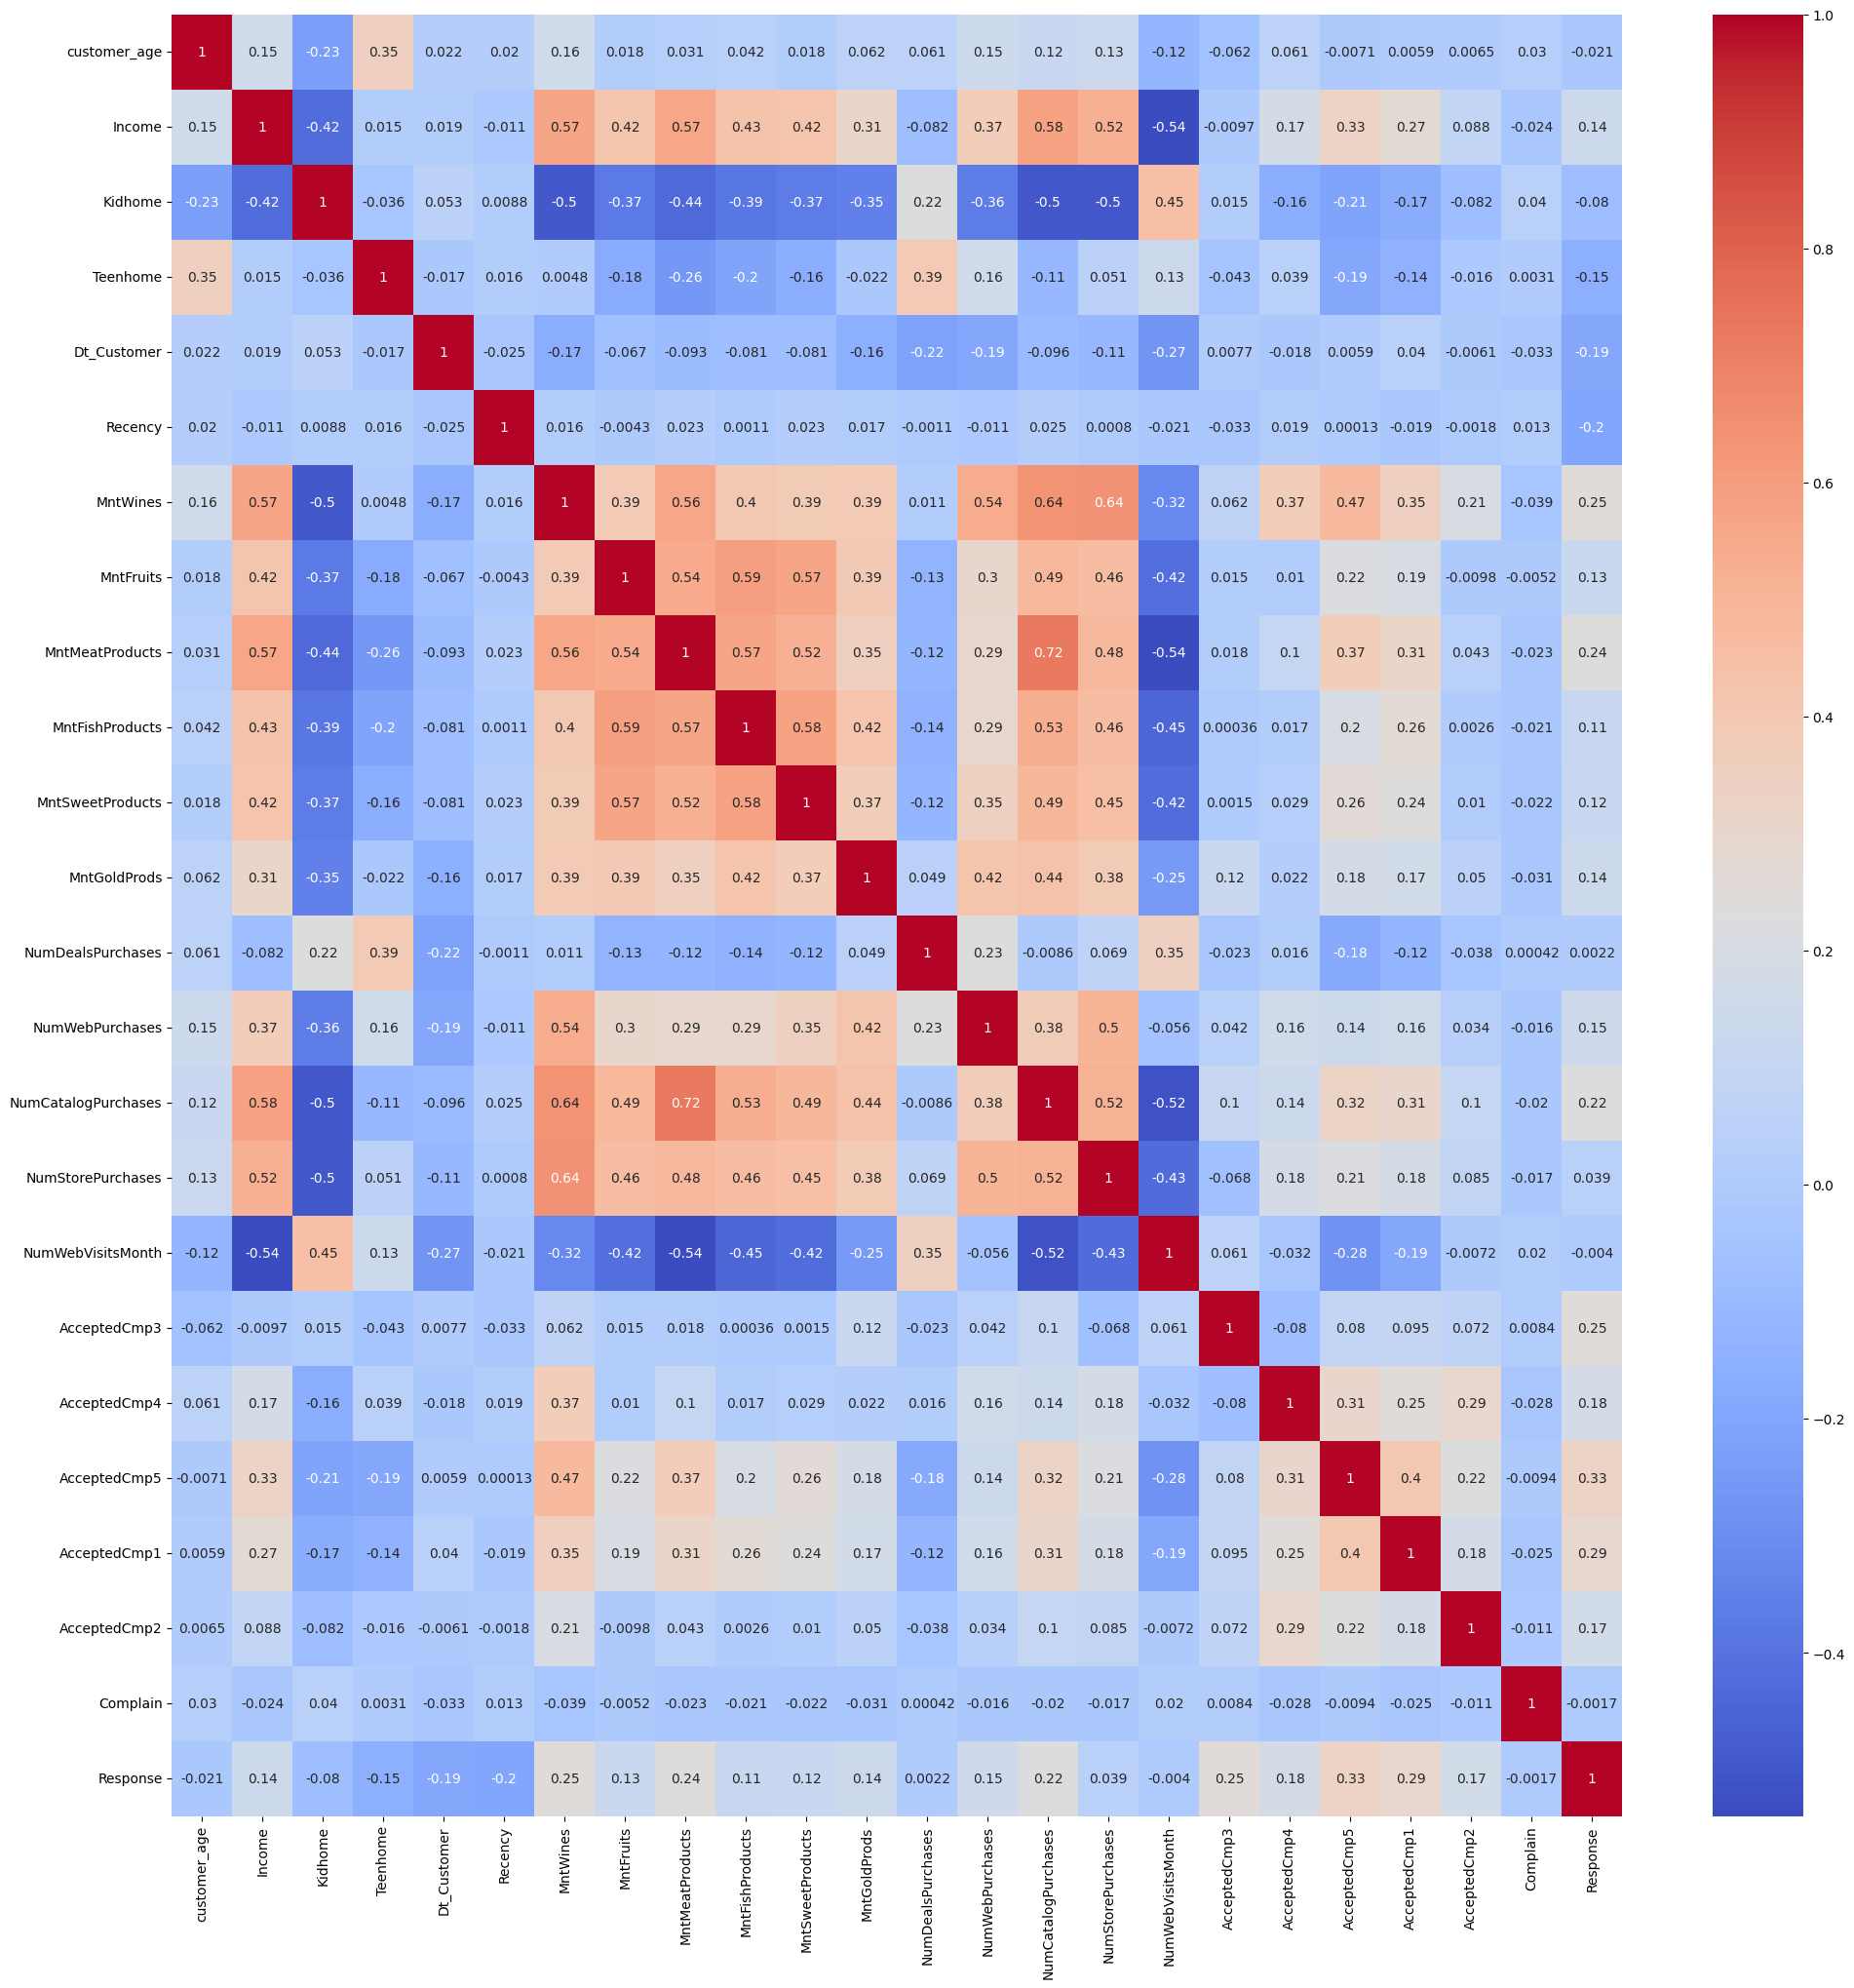

In [21]:
plt.figure(figsize=(24, 24))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', square=False)
plt.show()

looks like from correlation i can only get the relationship between a customers characteristics and their purchasing habits(this is because they are continous variables)
to correctly determine the relationship, visualize using barplots for categorical customer features, 

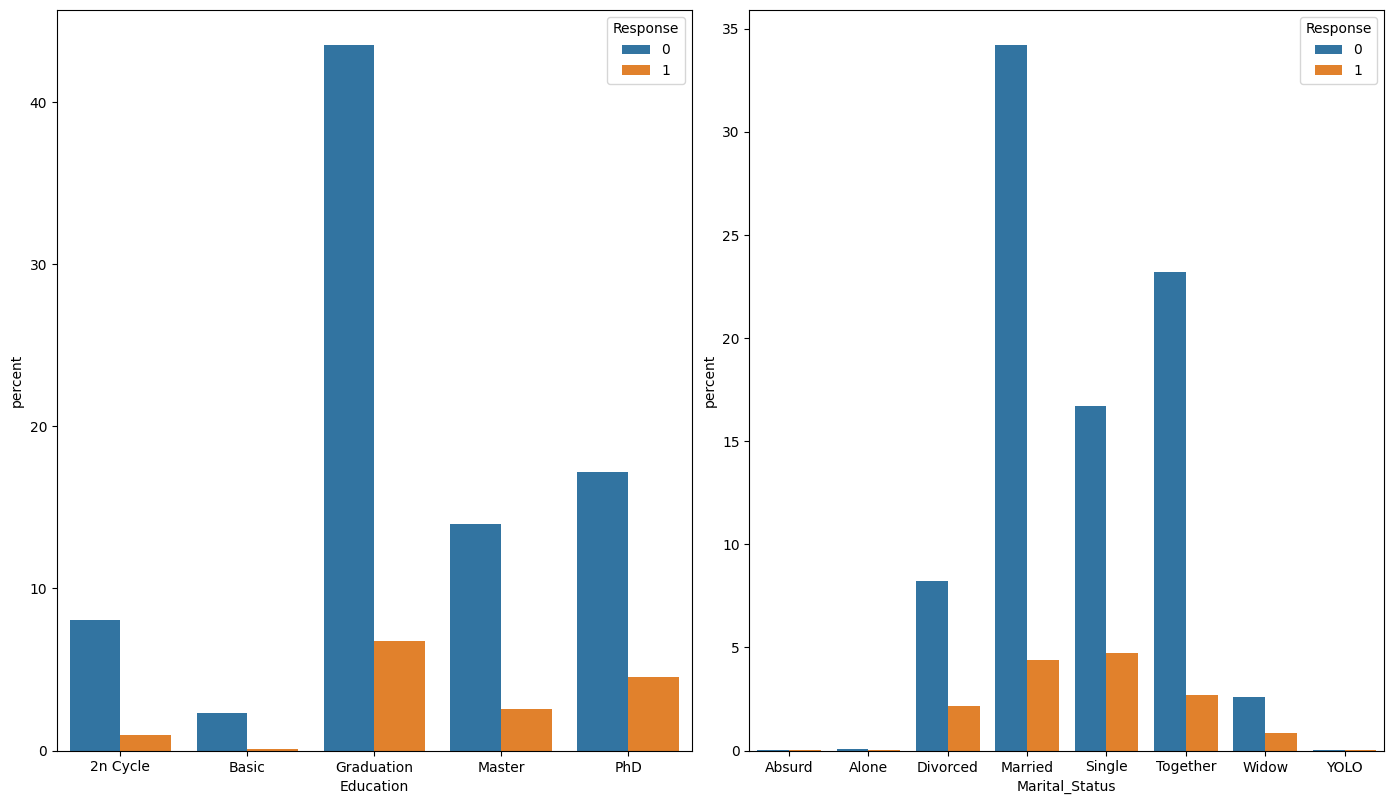

In [51]:
# Categorical value analysis
cat_cols = ['Education', 'Marital_Status']
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
axs= axs.flatten()
fig.tight_layout()


for index, col in enumerate(cat_cols):
    if index < len(cat_cols):
        sns.countplot(data=df, x=col, ax=axs[index], stat='percent',hue='Response')
    
    else:
        break
plt.show()

In [54]:
ct = pd.crosstab(df.Education, df.Response, normalize=True)*100
ct['sum'] = ct[0] + ct[1]
ct

Response,0,1,sum
Education,,,
2n Cycle,8.080357,0.982143,9.062500
Basic,2.321429,0.089286,2.410714
Graduation,43.526786,6.785714,50.312500
Master,13.973214,2.544643,16.517857
PhD,17.187500,4.508929,21.696429


In [39]:
pd.options.display.float_format = '{:.1f}%'.format
ed = df['Education'].value_counts(normalize=True)*100
ed

Education
Graduation   50.3%
PhD          21.7%
Master       16.5%
2n Cycle      9.1%
Basic         2.4%
Name: proportion, dtype: float64

In [38]:
pd.crosstab(df['Education'],
            df['Marital_Status'], normalize=True
            )*100

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0.000000,0.000000,1.026786,3.616071,1.651786,2.544643,0.223214,0.000000
Basic,0.000000,0.000000,0.044643,0.892857,0.803571,0.625000,0.044643,0.000000
Graduation,0.044643,0.044643,5.312500,19.330357,11.250000,12.767857,1.562500,0.000000
Master,0.044643,0.044643,1.651786,6.160714,3.348214,4.732143,0.535714,0.000000
PhD,0.000000,0.044643,2.321429,8.571429,4.375000,5.223214,1.071429,0.089286


<Axes: xlabel='Marital_Status', ylabel='Education'>

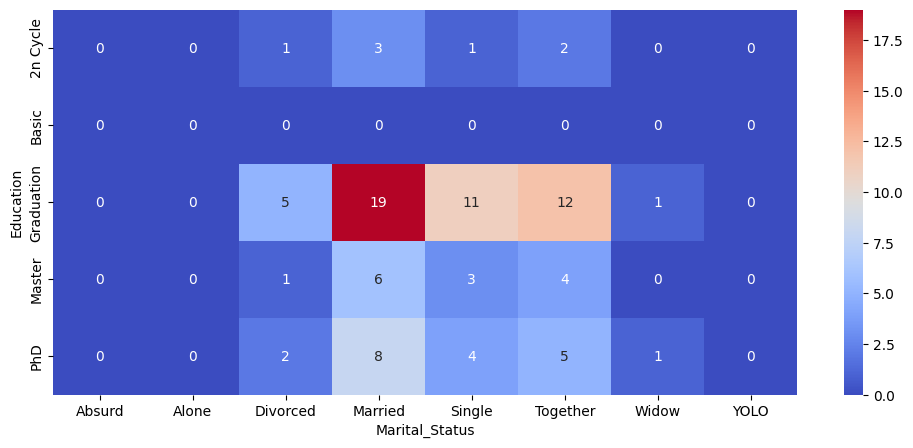

In [55]:
plt.figure(figsize=(12,5))
sns.heatmap((pd.crosstab(df['Education'],
            df['Marital_Status'], normalize=True
            )*100).astype('int'), annot=True, fmt="d", cmap='coolwarm')